In [1]:
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

project_dir = os.getcwd().split("notebook")[0]
sys.path.append(project_dir)

In [2]:
from src.handle_data import load_reviews
from src.preprocessing import clean_text

In [3]:
df = load_reviews("../data", load_all=True)

In [4]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 1600
Number of columns: 2


In [5]:
df.isnull().sum()

review    0
label     0
dtype: int64

label
deceptive    800
truthful     800
Name: count, dtype: int64


<Axes: xlabel='label', ylabel='count'>

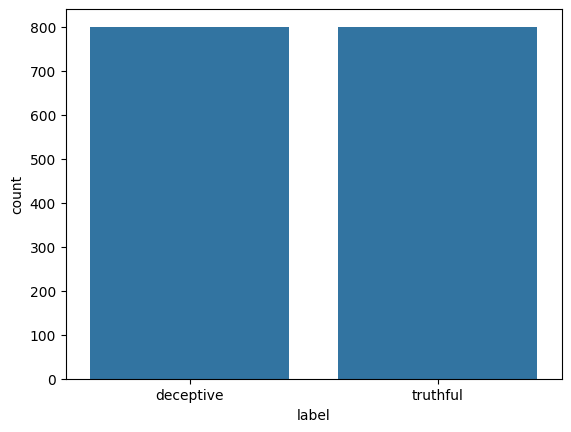

In [6]:
print(df['label'].value_counts())
sns.countplot(x='label', data=df)

In [7]:
print(f"Duplicate rows: {df.duplicated().sum()}")
data = df.drop_duplicates().copy()

Duplicate rows: 4


In [8]:
data["cleaned_review"]= df["review"].apply(clean_text)

In [9]:
data['review_length'] = data['cleaned_review'].apply(len)
data['word_count'] = data['cleaned_review'].apply(lambda x: len(x.split()))

<Axes: xlabel='review_length', ylabel='Count'>

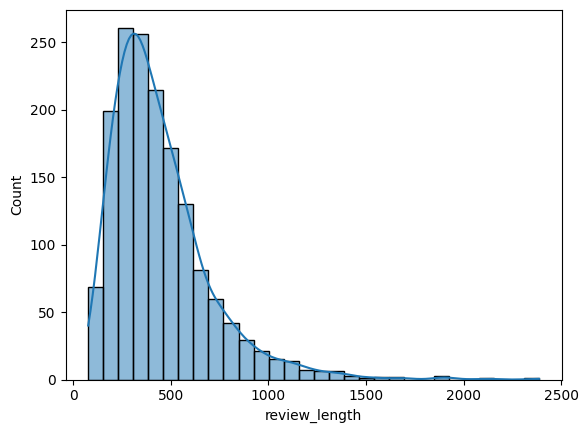

In [10]:
sns.histplot(data['review_length'], kde=True, bins=30)

<Axes: xlabel='word_count', ylabel='Count'>

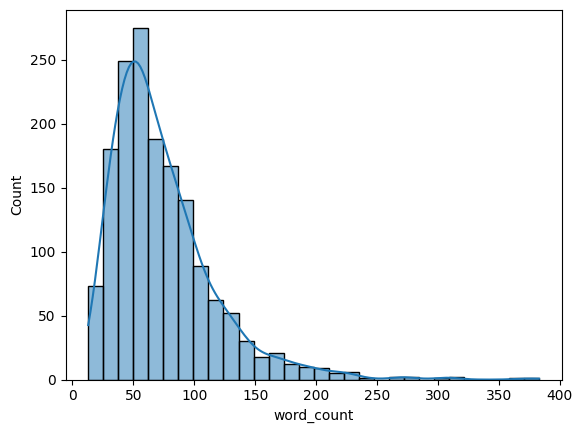

In [11]:
sns.histplot(data['word_count'], kde=True, bins=30)


<Axes: xlabel='label', ylabel='review_length'>

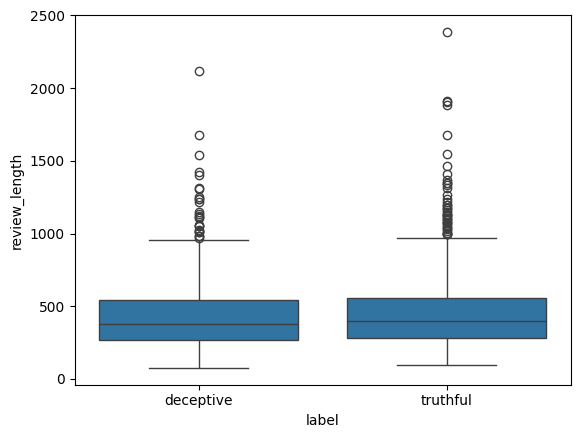

In [12]:
sns.boxplot(x='label', y='review_length', data=data)

<Axes: xlabel='label', ylabel='word_count'>

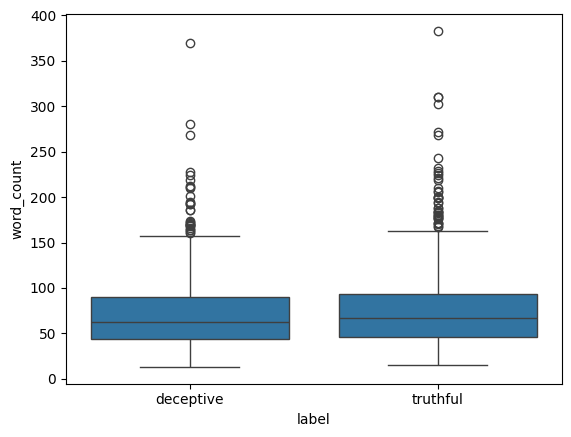

In [13]:
sns.boxplot(x='label', y='word_count', data=data)


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

truthful_reviews = data[data['label'] == 'truthful']['cleaned_review']
deceptive_reviews = data[data['label'] == 'deceptive']['cleaned_review']

vectorizer = CountVectorizer(max_features=20)
truthful_words = vectorizer.fit_transform(truthful_reviews).toarray()
deceptive_words = vectorizer.fit_transform(deceptive_reviews).toarray()

print("Top Words in Truthful Reviews:")
print(vectorizer.get_feature_names_out())
print("Top Words in Deceptive Reviews:")
print(vectorizer.get_feature_names_out())


Top Words in Truthful Reviews:
['bed' 'check' 'chicago' 'clean' 'desk' 'even' 'get' 'great' 'hotel'
 'like' 'look' 'night' 'one' 'place' 'room' 'servic' 'staff' 'stay' 'time'
 'would']
Top Words in Deceptive Reviews:
['bed' 'check' 'chicago' 'clean' 'desk' 'even' 'get' 'great' 'hotel'
 'like' 'look' 'night' 'one' 'place' 'room' 'servic' 'staff' 'stay' 'time'
 'would']


the top words for both deceptive and truthful are almost the same

In [ ]:
from wordcloud import WordCloud

truthful_text = " ".join(data[data['label'] == 'truthful']['cleaned_review'])
deceptive_text = " ".join(data[data['label'] == 'deceptive']['cleaned_review'])

truthful_wc = WordCloud(width=800, height=400).generate(truthful_text)
deceptive_wc = WordCloud(width=800, height=400).generate(deceptive_text)




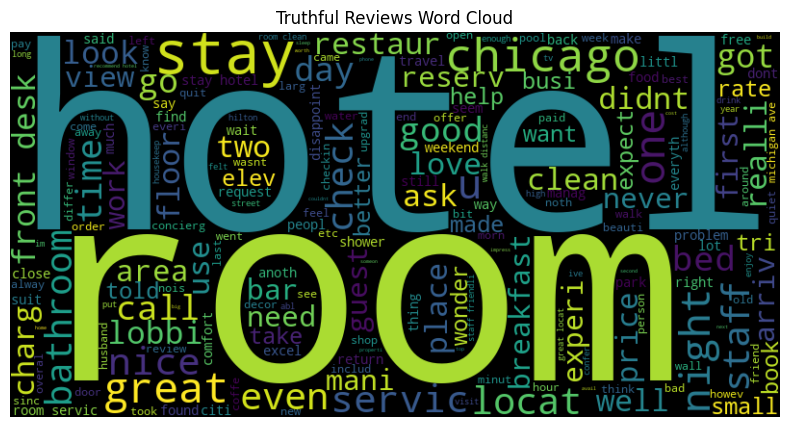

In [18]:
plt.figure(figsize=(10, 5))
plt.imshow(truthful_wc, interpolation='bilinear')
plt.axis("off")
plt.title("Truthful Reviews Word Cloud")
plt.show()


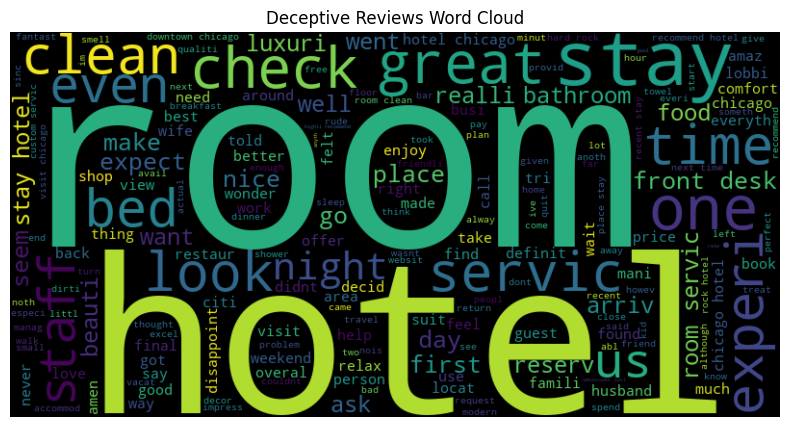

In [19]:
# Display the deceptive word cloud
plt.figure(figsize=(10, 5))
plt.imshow(deceptive_wc, interpolation='bilinear')
plt.axis("off")
plt.title("Deceptive Reviews Word Cloud")
plt.show()